
<a id='black-litterman'></a>
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>


<a id='index-0'></a>

# Two Modifications of Mean-variance Portfolio Theory

## Contents

- [Two Modifications of Mean-variance Portfolio Theory](#Two-Modifications-of-Mean-variance-Portfolio-Theory)  
  - [Overview](#Overview)  
  - [Appendix](#Appendix)  

**Authors:** Daniel Csaba, Thomas J. Sargent and Balint Szoke

## Overview

### Remarks About Estimating Means and Variances

The famous **Black-Litterman** (1992) [[BL92]](https://lectures.quantecon.org/py/zreferences.html#black1992global) portfolio choice model that we
describe in this lecture is motivated by the finding that with high or
moderate frequency data, means are more difficult to estimate than
variances

A model of **robust portfolio choice** that we’ll describe also begins
from the same starting point

To begin, we’ll take for granted that means are more difficult to
estimate that covariances and will focus on how Black and Litterman, on
the one hand, an robust control theorists, on the other, would recommend
modifying the **mean-variance portfolio choice model** to take that into
account

At the end of this lecture, we shall use some rates of convergence
results and some simulations to verify how means are more difficult to
estimate than variances

Among the ideas in play in this lecture will be

- Mean-variance portfolio theory  
- Bayesian approaches to estimating linear regressions  
- A risk-sensitivity operator and its connection to robust control
  theory  

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stat
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, FloatSlider

### Adjusting Mean-variance Portfolio Choice Theory for Distrust of Mean Excess Returns

This lecture describes two lines of thought that modify the classic
mean-variance portfolio choice model in ways designed to make its
recommendations more plausible

As we mentioned above, the two approaches build on a common and widespread hunch –
that because it is much easier statistically to estimate covariances of
excess returns than it is to estimate their means, it makes sense to
contemplated the consequences of adjusting investors’ subjective beliefs
about mean returns in order to render more sensible decisions

Both of the adjustments that we describe are designed to confront a
widely recognized embarrassment to mean-variance portfolio theory,
namely, that it usually implies taking very extreme long-short portfolio
positions

### Mean-variance Portfolio Choice

A risk free security earns one-period net return $ r_f $

An $ n \times 1 $ vector of risky securities earns
an $ n \times 1 $ vector $ \vec r - r_f {\bf 1} $ of *excess
returns*, where $ {\bf 1} $ is an $ n \times 1 $ vector of
ones

The excess return vector is multivariate normal with mean $ \mu $
and covariance matrix $ \Sigma $, which we express either as

$$
\vec r - r_f {\bf 1} \sim {\mathcal N}(\mu, \Sigma)
$$

or

$$
\vec r - r_f {\bf 1} = \mu + C \epsilon
$$

where $ \epsilon \sim {\mathcal N}(0, I) $ is an $ n \times 1 $
random vector.

Let $ w $ be an $ n \times 1 $  vector of portfolio weights

A portfolio consisting $ w $ earns returns

$$
w' (\vec r - r_f {\bf 1}) \sim {\mathcal N}(w' \mu, w' \Sigma w )
$$

The **mean-variance portfolio choice problem** is to choose $ w $ to
maximize


<a id='equation-choice-problem'></a>
$$
U(\mu,\Sigma;w) = w'\mu - \frac{\delta}{2} w' \Sigma w \tag{1}
$$

where $ \delta > 0 $ is a risk-aversion parameter. The first-order
condition for maximizing [(1)](#equation-choice-problem) with respect to the vector $ w $ is

$$
\mu = \delta \Sigma w
$$

which implies the following design of a risky portfolio:


<a id='equation-risky-portfolio'></a>
$$
w = (\delta \Sigma)^{-1} \mu \tag{2}
$$

### Estimating $ \mu $ and $ \Sigma $

The key inputs into the portfolio choice model [(2)](#equation-risky-portfolio) are

- estimates of the parameters $ \mu, \Sigma $ of the random excess
  return vector$ (\vec r - r_f {\bf 1}) $  
- the risk-aversion parameter $ \delta $  


A standard way of estimating $ \mu $ is maximum-likelihood or least
squares; that amounts to estimating $ \mu $ by a sample mean of
excess returns and estimating $ \Sigma $ by a sample covariance
matrix

### The Black-Litterman Starting Point

When estimates of $ \mu $ and $ \Sigma $ from historical
sample means and covariances have been combined with **reasonable** values
of the risk-aversion parameter $ \delta $ to compute an
optimal portfolio from formula [(2)](#equation-risky-portfolio), a typical outcome has been
$ w $‘s with **extreme long and short positions**

A common reaction to these outcomes is that they are so unreasonable that a portfolio
manager cannot recommend them to a customer

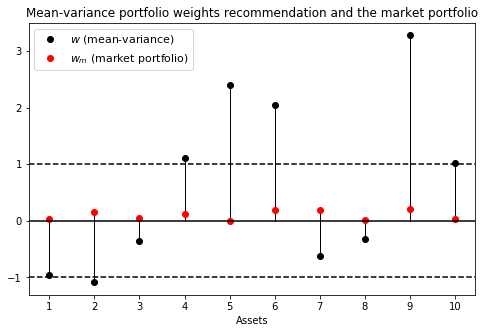

In [2]:
np.random.seed(12)

N = 10                                           # Number of assets
T = 200                                          # Sample size

# random market portfolio (sum is normalized to 1)
w_m = np.random.rand(N)
w_m = w_m / (w_m.sum())

# True risk premia and variance of excess return (constructed so that the Sharpe ratio is 1)
μ = (np.random.randn(N) + 5)  /100                   # Mean excess return (risk premium)
S = np.random.randn(N, N)                            # Random matrix for the covariance matrix
V = S @ S.T                                          # Turn the random matrix into symmetric psd
Σ = V * (w_m @ μ)**2 / (w_m @ V @ w_m)               # Make sure that the Sharpe ratio is one

# Risk aversion of market portfolio holder
δ = 1 / np.sqrt(w_m @ Σ @ w_m)

# Generate a sample of excess returns
excess_return = stat.multivariate_normal(μ, Σ)
sample = excess_return.rvs(T)

# Estimate μ and Σ
μ_est = sample.mean(0).reshape(N, 1)
Σ_est = np.cov(sample.T)

w = np.linalg.solve(δ * Σ_est, μ_est)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Mean-variance portfolio weights recommendation and the market portfolio')
ax.plot(np.arange(N)+1, w, 'o', c='k', label='$w$ (mean-variance)')
ax.plot(np.arange(N)+1, w_m, 'o', c='r', label='$w_m$ (market portfolio)')
ax.vlines(np.arange(N)+1, 0, w, lw=1)
ax.vlines(np.arange(N)+1, 0, w_m, lw=1)
ax.axhline(0, c='k')
ax.axhline(-1, c='k', ls='--')
ax.axhline(1, c='k', ls='--')
ax.set_xlabel('Assets')
ax.xaxis.set_ticks(np.arange(1, N+1, 1))
plt.legend(numpoints=1, fontsize=11)
plt.show()

Black and Litterman’s responded to this situation in the following way:

- They continue to accept [(2)](#equation-risky-portfolio) as a good model for choosing an optimal
  portfolio $ w $  
- They want to continue to allow the customer to express his or her
  risk tolerance by setting $ \delta $  
- Leaving $ \Sigma $ at its maximum-likelihood value, they push
  $ \mu $ away from its maximum value in a way designed to make
  portfolio choices that are more plausible in terms of conforming to
  what most people actually do  


In particular, given $ \Sigma $ and a reasonable value
of $ \delta $, Black and Litterman reverse engineered a vector
$ \mu_{BL} $ of mean excess returns that makes the $ w $
implied by formula [(2)](#equation-risky-portfolio) equal the **actual** market portfolio
$ w_m $, so that

$$
w_m = (\delta \Sigma)^{-1} \mu_{BL}
$$

### Details

Let’s define

$$
w_m' \mu \equiv ( r_m - r_f)
$$

as the (scalar) excess return on the market portfolio $ w_m $

Define

$$
\sigma^2 = w_m' \Sigma w_m
$$

as the variance of the excess return on the market portfolio
$ w_m $

Define

$$
{\bf SR}_m = \frac{ r_m - r_f}{\sigma}
$$

as the **Sharpe-ratio** on the market portfolio $ w_m $

Let $ \delta_m $ be the value of the risk aversion parameter that
induces an investor to hold the market portfolio in light of the optimal
portfolio choice rule [(2)](#equation-risky-portfolio)

Evidently, portfolio rule [(2)](#equation-risky-portfolio) then implies that
$ r_m - r_f = \delta_m \sigma^2 $ or

$$
\delta_m = \frac{r_m - r_f}{\sigma^2}
$$

or

$$
\delta_m = \frac{{\bf SR}_m}{\sigma}
$$

Following the Black-Litterman philosophy, our first step will be to back
a value of $ \delta_m $ from

- an estimate of the Sharpe-ratio, and  
- our maximum likelihood estimate of $ \sigma $ drawn from our
  estimates or $ w_m $ and $ \Sigma $  


The second key Black-Litterman step is then to use this value of
$ \delta $ together with the maximum likelihood estimate of
$ \Sigma $ to deduce a $ \mu_{\bf BL} $ that verifies
portfolio rule [(2)](#equation-risky-portfolio) at the market portfolio $ w = w_m $

$$
\mu_m = \delta_m \Sigma w_m
$$

The starting point of the Black-Litterman portfolio choice model is thus
a pair $ (\delta_m, \mu_m) $ that tells the customer to hold the
market portfolio

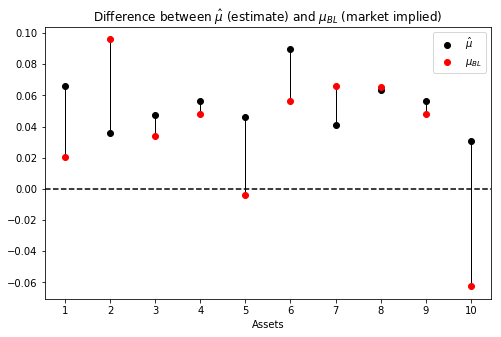

In [3]:
# Observed mean excess market return
r_m = w_m @ μ_est

# Estimated variance of market portfolio
σ_m = w_m @ Σ_est @ w_m

# Sharpe-ratio
SR_m = r_m / np.sqrt(σ_m)

# Risk aversion of market portfolio holder
d_m = r_m / σ_m

# Derive "view" which would induce market portfolio
μ_m = (d_m * Σ_est @ w_m).reshape(N, 1)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title(r'Difference between $\hat{\mu}$ (estimate) and $\mu_{BL}$ (market implied)')
ax.plot(np.arange(N)+1, μ_est, 'o', c='k', label='$\hat{\mu}$')
ax.plot(np.arange(N)+1, μ_m, 'o', c='r', label='$\mu_{BL}$')
ax.vlines(np.arange(N) + 1, μ_m, μ_est, lw=1)
ax.axhline(0, c='k', ls='--')
ax.set_xlabel('Assets')
ax.xaxis.set_ticks(np.arange(1, N+1, 1))
plt.legend(numpoints=1)
plt.show()

### Adding *Views*

Black and Litterman start with a baseline customer who asserts that he
or she shares the **market’s views**, which means that his or her
believes that excess returns are governed by


<a id='equation-excess-returns'></a>
$$
\vec r - r_f {\bf 1} \sim {\mathcal N}( \mu_{BL}, \Sigma) \tag{3}
$$

Black and Litterman would advise that customer to hold the market
portfolio of risky securities

Black and Litterman then imagine a consumer who would like to express a
view that differs from the market’s

The consumer wants appropriately to
mix his view with the market’s before using [(2)](#equation-risky-portfolio) to choose a portfolio

Suppose that the customer’s view is expressed by a hunch that rather
than [(3)](#equation-excess-returns), excess returns are governed by

$$
\vec r - r_f {\bf 1} \sim {\mathcal N}( \hat \mu, \tau \Sigma)
$$

where $ \tau > 0 $ is a scalar parameter that determines how the
decision maker wants to mix his view $ \hat \mu $ with the market’s
view $ \mu_{\bf BL} $

Black and Litterman would then use a formula like the following one to
mix the views $ \hat \mu $ and $ \mu_{\bf BL} $


<a id='equation-mix-views'></a>
$$
\tilde \mu = (\Sigma^{-1} + (\tau \Sigma)^{-1})^{-1} (\Sigma^{-1} \mu_{BL}  + (\tau \Sigma)^{-1} \hat \mu) \tag{4}
$$

Black and Litterman would then advice the customer to hold the portfolio
associated with these views implied by rule [(2)](#equation-risky-portfolio):

$$
\tilde w = (\delta \Sigma)^{-1} \tilde \mu
$$

This portfolio $ \tilde w $ will deviate from the
portfolio $ w_{BL} $ in amounts that depend on the mixing parameter
$ \tau $.

If $ \hat \mu $ is the maximum likelihood estimator
and $ \tau $ is chosen heavily to weight this view, then the
customer’s portfolio will involve big short-long positions

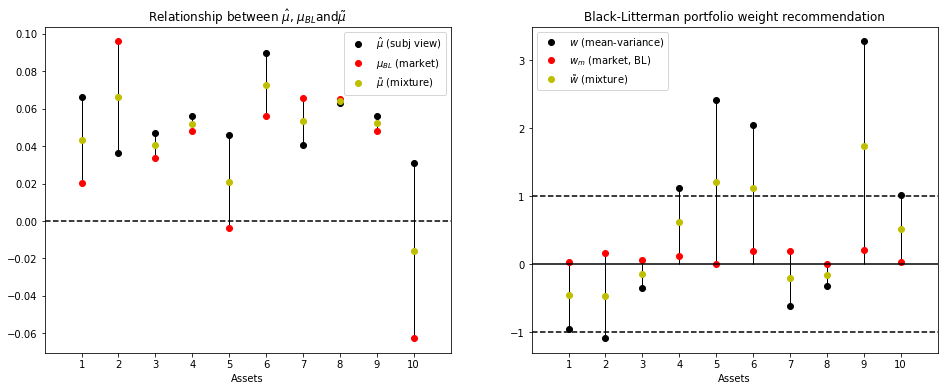

In [4]:
def black_litterman(λ, μ1, μ2, Σ1, Σ2):
    """
    This function calculates the Black-Litterman mixture
    mean excess return and covariance matrix
    """
    Σ1_inv = np.linalg.inv(Σ1)
    Σ2_inv = np.linalg.inv(Σ2)

    μ_tilde = np.linalg.solve(Σ1_inv + λ * Σ2_inv,
                              Σ1_inv @ μ1 + λ * Σ2_inv @ μ2)
    return μ_tilde

τ = 1
μ_tilde = black_litterman(1, μ_m, μ_est, Σ_est, τ * Σ_est)

# The Black-Litterman recommendation for the portfolio weights
w_tilde = np.linalg.solve(δ * Σ_est, μ_tilde)

τ_slider = FloatSlider(min=0.05, max=10, step=0.5, value=τ)

@interact(τ=τ_slider)
def BL_plot(τ):
    μ_tilde = black_litterman(1, μ_m, μ_est, Σ_est, τ * Σ_est)
    w_tilde = np.linalg.solve(δ * Σ_est, μ_tilde)

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].plot(np.arange(N)+1, μ_est, 'o', c='k', label=r'$\hat{\mu}$ (subj view)')
    ax[0].plot(np.arange(N)+1, μ_m, 'o', c='r', label=r'$\mu_{BL}$ (market)')
    ax[0].plot(np.arange(N)+1, μ_tilde, 'o', c='y', label=r'$\tilde{\mu}$ (mixture)')
    ax[0].vlines(np.arange(N)+1, μ_m, μ_est, lw=1)
    ax[0].axhline(0, c='k', ls='--')
    ax[0].set(xlim=(0, N+1), xlabel='Assets',
              title=r'Relationship between $\hat{\mu}$, $\mu_{BL}$and$\tilde{\mu}$')
    ax[0].xaxis.set_ticks(np.arange(1, N+1, 1))
    ax[0].legend(numpoints=1)

    ax[1].set_title('Black-Litterman portfolio weight recommendation')
    ax[1].plot(np.arange(N)+1, w, 'o', c='k', label=r'$w$ (mean-variance)')
    ax[1].plot(np.arange(N)+1, w_m, 'o', c='r', label=r'$w_{m}$ (market, BL)')
    ax[1].plot(np.arange(N)+1, w_tilde, 'o', c='y', label=r'$\tilde{w}$ (mixture)')
    ax[1].vlines(np.arange(N)+1, 0, w, lw=1)
    ax[1].vlines(np.arange(N)+1, 0, w_m, lw=1)
    ax[1].axhline(0, c='k')
    ax[1].axhline(-1, c='k', ls='--')
    ax[1].axhline(1, c='k', ls='--')
    ax[1].set(xlim=(0, N+1), xlabel='Assets',
              title='Black-Litterman portfolio weight recommendation')
    ax[1].xaxis.set_ticks(np.arange(1, N+1, 1))
    ax[1].legend(numpoints=1)
    plt.show()

### Bayes Interpretation of the Black-Litterman Recommendation

Consider the following Bayesian interpretation of the Black-Litterman
recommendation

The prior belief over the mean excess returns is consistent with the
market porfolio and is given by

$$
\mu \sim \mathcal{N}(\mu_{BL}, \Sigma)
$$

Given a particular realization of the mean excess returns
$ \mu $ one observes the average excess returns $ \hat \mu $
on the market according to the distribution

$$
\hat \mu \mid \mu, \Sigma \sim \mathcal{N}(\mu, \tau\Sigma)
$$

where $ \tau $ is typically small capturing the idea that the
variation in the mean is smaller than the variation of the individual
random variable

Given the realized excess returns one should then update the prior over
the mean excess returns according to Bayes rule

The corresponding
posterior over mean excess returns is normally distributed with mean

$$
(\Sigma^{-1} + (\tau \Sigma)^{-1})^{-1} (\Sigma^{-1}\mu_{BL}   + (\tau \Sigma)^{-1} \hat \mu)
$$

The covariance matrix is

$$
(\Sigma^{-1} + (\tau \Sigma)^{-1})^{-1}
$$

Hence, the Black-Litterman recommendation is consistent with the Bayes
update of the prior over the mean excess returns in light of the
realized average excess returns on the market

### Curve Decolletage

Consider two independent “competing” views on the excess market returns

$$
\vec r_e  \sim {\mathcal N}( \mu_{BL}, \Sigma)
$$

and

$$
\vec r_e \sim {\mathcal N}( \hat{\mu}, \tau\Sigma)
$$

A special feature of the multivariate normal random variable
$ Z $ is that its density function depends only on the (Euclidiean)
length of its realization $ z $

Formally, let the
$ k $-dimensional random vector be

$$
Z\sim \mathcal{N}(\mu, \Sigma)
$$

then

$$
\bar{Z} \equiv \Sigma(Z-\mu)\sim \mathcal{N}(\mathbf{0}, I)
$$

and so the points where the density takes the same value can be
described by the ellipse


<a id='equation-ellipse'></a>
$$
\bar z \cdot \bar z =  (z - \mu)'\Sigma^{-1}(z - \mu) = \bar d \tag{5}
$$

where $ \bar d\in\mathbb{R}_+ $ denotes the (transformation) of a
particular density value

The curves defined by equation [(5)](#equation-ellipse) can be
labelled as iso-likelihood ellipses

> **Remark:** More generally there is a class of density functions
that possesses this feature, i.e.

$$
\exists g: \mathbb{R}_+ \mapsto \mathbb{R}_+ \ \ \text{ and } \ \ c \geq 0,
\ \ \text{s.t.  the density } \ \ f \ \ \text{of} \ \ Z  \ \
\text{ has the form } \quad f(z) = c g(z\cdot z)
$$

This property is called **spherical symmetry** (see p 81. in Leamer
(1978) [[Lea78]](https://lectures.quantecon.org/py/zreferences.html#leamer1978specification))


In our specific example, we can use the pair
$ (\bar d_1, \bar d_2) $ as being two “likelihood” values for which
the corresponding iso-likelihood ellipses in the excess return space are
given by

$$
\begin{align}
(\vec r_e - \mu_{BL})'\Sigma^{-1}(\vec r_e - \mu_{BL}) &= \bar d_1 \\
(\vec r_e - \hat \mu)'\left(\tau \Sigma\right)^{-1}(\vec r_e - \hat \mu) &= \bar d_2
\end{align}
$$

Notice that for particular $ \bar d_1 $ and $ \bar d_2 $ values
the two ellipses have a tangency point

These tangency points, indexed
by the pairs $ (\bar d_1, \bar d_2) $, characterize points
$ \vec r_e $ from which there exists no deviation where one can
increase the likelihood of one view without decreasing the likelihood of
the other view

The pairs $ (\bar d_1, \bar d_2) $ for which there
is such a point outlines a curve in the excess return space. This curve
is reminiscent of the Pareto curve in an Edgeworth-box setting

Dickey (1975) [[Dic75]](https://lectures.quantecon.org/py/zreferences.html#dickey1975) calls it a *curve decolletage*

Leamer (1978) [[Lea78]](https://lectures.quantecon.org/py/zreferences.html#leamer1978specification) calls it an *information contract curve* and
describes it by the following program: maximize the likelihood of one
view, say the Black-Litterman recommendation, while keeping the
likelihood of the other view at least at a prespecified constant
$ \bar d_2 $

$$
\begin{align*}
 \bar d_1(\bar d_2) &\equiv \max_{\vec r_e} \ \ (\vec r_e - \mu_{BL})'\Sigma^{-1}(\vec r_e - \mu_{BL}) \\
\text{subject to }  \quad  &(\vec r_e - \hat\mu)'(\tau\Sigma)^{-1}(\vec r_e - \hat \mu) \geq \bar d_2
\end{align*}
$$

Denoting the multiplier on the constraint by $ \lambda $, the
first-order condition is

$$
2(\vec r_e - \mu_{BL} )'\Sigma^{-1} + \lambda 2(\vec r_e - \hat\mu)'(\tau\Sigma)^{-1} = \mathbf{0}
$$

which defines the *information contract curve* between
$ \mu_{BL} $ and $ \hat \mu $


<a id='equation-info-curve'></a>
$$
\vec r_e = (\Sigma^{-1} + \lambda (\tau \Sigma)^{-1})^{-1} (\Sigma^{-1} \mu_{BL}
+ \lambda (\tau \Sigma)^{-1}\hat \mu ) \tag{6}
$$

Note that if $ \lambda = 1 $, [(6)](#equation-info-curve) is equivalent with [(4)](#equation-mix-views) and it
identifies one point on the information contract curve.

Furthermore, because $ \lambda $ is a function of the minimum likelihood
$ \bar d_2 $ on the RHS of the constraint, by varying
$ \bar d_2 $ (or $ \lambda $ ), we can trace out the whole curve
as the figure below illustrates

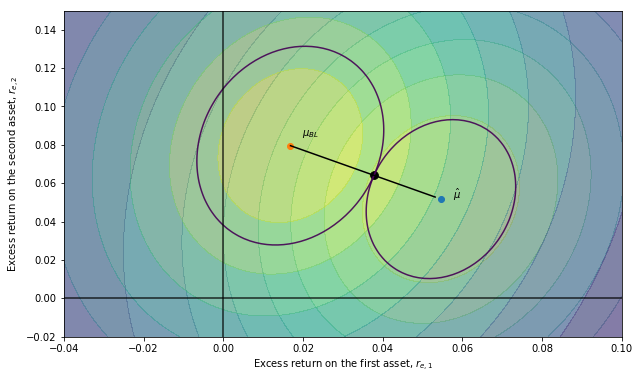

In [5]:
np.random.seed(1987102)

N = 2                                           # Number of assets
T = 200                                         # Sample size
τ = 0.8

# Random market portfolio (sum is normalized to 1)
w_m = np.random.rand(N)
w_m = w_m / (w_m.sum())

μ = (np.random.randn(N) + 5) / 100
S = np.random.randn(N, N)
V = S @ S.T
Σ = V * (w_m @ μ)**2 / (w_m @ V @ w_m)

excess_return = stat.multivariate_normal(μ, Σ)
sample = excess_return.rvs(T)

μ_est = sample.mean(0).reshape(N, 1)
Σ_est = np.cov(sample.T)

σ_m = w_m @ Σ_est @ w_m
d_m = (w_m @ μ_est) / σ_m
μ_m = (d_m * Σ_est @ w_m).reshape(N, 1)

N_r1, N_r2 = 100, 100
r1 = np.linspace(-0.04, .1, N_r1)
r2 = np.linspace(-0.02, .15, N_r2)

λ_grid = np.linspace(.001, 20, 100)
curve = np.asarray([black_litterman(λ, μ_m, μ_est, Σ_est,
                                    τ * Σ_est).flatten() for λ in λ_grid])

λ_slider = FloatSlider(min=.1, max=7, step=.5, value=1)

@interact(λ=λ_slider)
def decolletage(λ):
    dist_r_BL = stat.multivariate_normal(μ_m.squeeze(), Σ_est)
    dist_r_hat = stat.multivariate_normal(μ_est.squeeze(), τ * Σ_est)

    X, Y = np.meshgrid(r1, r2)
    Z_BL = np.zeros((N_r1, N_r2))
    Z_hat = np.zeros((N_r1, N_r2))

    for i in range(N_r1):
        for j in range(N_r2):
            Z_BL[i, j] = dist_r_BL.pdf(np.hstack([X[i, j], Y[i, j]]))
            Z_hat[i, j] = dist_r_hat.pdf(np.hstack([X[i, j], Y[i, j]]))

    μ_tilde = black_litterman(λ, μ_m, μ_est, Σ_est, τ * Σ_est).flatten()

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.contourf(X, Y, Z_hat, cmap='viridis', alpha =.4)
    ax.contourf(X, Y, Z_BL, cmap='viridis', alpha =.4)
    ax.contour(X, Y, Z_BL, [dist_r_BL.pdf(μ_tilde)], cmap='viridis', alpha=.9)
    ax.contour(X, Y, Z_hat, [dist_r_hat.pdf(μ_tilde)], cmap='viridis', alpha=.9)
    ax.scatter(μ_est[0], μ_est[1])
    ax.scatter(μ_m[0], μ_m[1])
    ax.scatter(μ_tilde[0], μ_tilde[1], c='k', s=20*3)

    ax.plot(curve[:, 0], curve[:, 1], c='k')
    ax.axhline(0, c='k', alpha=.8)
    ax.axvline(0, c='k', alpha=.8)
    ax.set_xlabel(r'Excess return on the first asset, $r_{e, 1}$')
    ax.set_ylabel(r'Excess return on the second asset, $r_{e, 2}$')
    ax.text(μ_est[0] + 0.003, μ_est[1], r'$\hat{\mu}$')
    ax.text(μ_m[0] + 0.003, μ_m[1] + 0.005, r'$\mu_{BL}$')
    plt.show()

Note that the line that connects the two points
$ \hat \mu $ and $ \mu_{BL} $ is linear, which comes from the
fact that the covariance matrices of the two competing distributions
(views) are proportional to each other

To illustrate the fact that this is not necessarily the case, consider
another example using the same parameter values, except that the “second
view” constituting the constraint has covariance matrix
$ \tau I $ instead of $ \tau \Sigma $

This leads to the
following figure, on which the curve connecting $ \hat \mu $
and $ \mu_{BL} $ are bending

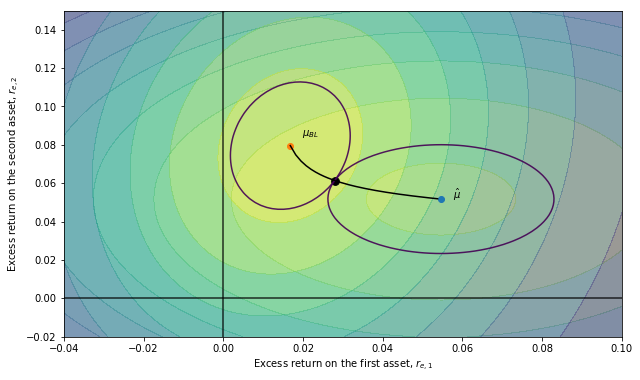

In [6]:
λ_grid = np.linspace(.001, 20000, 1000)
curve = np.asarray([black_litterman(λ, μ_m, μ_est, Σ_est,
                                    τ * np.eye(N)).flatten() for λ in λ_grid])

λ_slider = FloatSlider(min=5, max=1500, step=100, value=200)

@interact(λ=λ_slider)
def decolletage(λ):
    dist_r_BL = stat.multivariate_normal(μ_m.squeeze(), Σ_est)
    dist_r_hat = stat.multivariate_normal(μ_est.squeeze(), τ * np.eye(N))

    X, Y = np.meshgrid(r1, r2)
    Z_BL = np.zeros((N_r1, N_r2))
    Z_hat = np.zeros((N_r1, N_r2))

    for i in range(N_r1):
        for j in range(N_r2):
            Z_BL[i, j] = dist_r_BL.pdf(np.hstack([X[i, j], Y[i, j]]))
            Z_hat[i, j] = dist_r_hat.pdf(np.hstack([X[i, j], Y[i, j]]))

    μ_tilde = black_litterman(λ, μ_m, μ_est, Σ_est, τ * np.eye(N)).flatten()

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.contourf(X, Y, Z_hat, cmap='viridis', alpha=.4)
    ax.contourf(X, Y, Z_BL, cmap='viridis', alpha=.4)
    ax.contour(X, Y, Z_BL, [dist_r_BL.pdf(μ_tilde)], cmap='viridis', alpha=.9)
    ax.contour(X, Y, Z_hat, [dist_r_hat.pdf(μ_tilde)], cmap='viridis', alpha=.9)
    ax.scatter(μ_est[0], μ_est[1])
    ax.scatter(μ_m[0], μ_m[1])

    ax.scatter(μ_tilde[0], μ_tilde[1], c='k', s=20*3)

    ax.plot(curve[:, 0], curve[:, 1], c='k')
    ax.axhline(0, c='k', alpha=.8)
    ax.axvline(0, c='k', alpha=.8)
    ax.set_xlabel(r'Excess return on the first asset, $r_{e, 1}$')
    ax.set_ylabel(r'Excess return on the second asset, $r_{e, 2}$')
    ax.text(μ_est[0] + 0.003, μ_est[1], r'$\hat{\mu}$')
    ax.text(μ_m[0] + 0.003, μ_m[1] + 0.005, r'$\mu_{BL}$')
    plt.show()

### Black-Litterman Recommendation as Regularization

First, consider the OLS regression

$$
\min_{\beta} \Vert X\beta - y \Vert^2
$$

which yields the solution

$$
\hat{\beta}_{OLS} = (X'X)^{-1}X'y
$$

A common performance measure of estimators is the *mean squared error
(MSE)*

An estimator is “good” if its MSE is realtively small. Suppose
that $ \beta_0 $ is the “true” value of the coefficient, then the MSE
of the OLS estimator is

$$
\text{mse}(\hat \beta_{OLS}, \beta_0) := \mathbb E \Vert \hat \beta_{OLS} - \beta_0\Vert^2 =
\underbrace{\mathbb E \Vert \hat \beta_{OLS} - \mathbb E
\beta_{OLS}\Vert^2}_{\text{variance}} +
\underbrace{\Vert \mathbb E \hat\beta_{OLS} - \beta_0\Vert^2}_{\text{bias}}
$$

From this decomposition one can see that in order for the MSE to be
small, both the bias and the variance terms must be small

For example,
consider the case when $ X $ is a $ T $-vector of ones (where
$ T $ is the sample size), so $ \hat\beta_{OLS} $ is simply the
sample average, while $ \beta_0\in \mathbb{R} $ is defined by the
true mean of $ y $

In this example the MSE is

$$
\text{mse}(\hat \beta_{OLS}, \beta_0) = \underbrace{\frac{1}{T^2}
\mathbb E \left(\sum_{t=1}^{T} (y_{t}- \beta_0)\right)^2 }_{\text{variance}} +
\underbrace{0}_{\text{bias}}
$$

However, because there is a trade-off between the estimator’s bias and
variance, there are cases when by permitting a small bias we can
substantially reduce the variance so overall the MSE gets smaller

A typical scenario when this proves to be useful is when the number of
coefficients to be estimated is large relative to the sample size

In these cases one approach to handle the bias-variance trade-off is the
so called *Tikhonov regularization*

A general form with regularization matrix $ \Gamma $ can be written as

$$
\min_{\beta} \Big\{ \Vert X\beta - y \Vert^2 + \Vert \Gamma (\beta - \tilde \beta) \Vert^2 \Big\}
$$

which yields the solution

$$
\hat{\beta}_{Reg} = (X'X + \Gamma'\Gamma)^{-1}(X'y + \Gamma'\Gamma\tilde \beta)
$$

Substituting the value of $ \hat{\beta}_{OLS} $ yields

$$
\hat{\beta}_{Reg} = (X'X + \Gamma'\Gamma)^{-1}(X'X\hat{\beta}_{OLS} + \Gamma'\Gamma\tilde \beta)
$$

Often, the regularization matrix takes the form
$ \Gamma = \lambda I $ with $ \lambda>0 $
and $ \tilde \beta = \mathbf{0} $

Then the Tikhonov regularization is equivalent to what is called *ridge regression* in statistics

To illustrate how this estimator addresses the bias-variance trade-off,
we compute the MSE of the ridge estimator

$$
\text{mse}(\hat \beta_{\text{ridge}}, \beta_0) = \underbrace{\frac{1}{(T+\lambda)^2}
\mathbb E \left(\sum_{t=1}^{T} (y_{t}- \beta_0)\right)^2 }_{\text{variance}} +
\underbrace{\left(\frac{\lambda}{T+\lambda}\right)^2 \beta_0^2}_{\text{bias}}
$$

The ridge regression shrinks the coefficients of the estimated vector
towards zero relative to the OLS estimates thus reducing the variance
term at the cost of introducing a “small” bias

However, there is nothing special about the zero vector

When $ \tilde \beta \neq \mathbf{0} $ shrinkage occurs in the direction
of $ \tilde \beta $

Now, we can give a regularization interpretation of the Black-Litterman
portfolio recommendation

To this end, simplify first the equation [(4)](#equation-mix-views) characterizing the Black-Litterman recommendation

$$
\begin{align*}
\tilde \mu &= (\Sigma^{-1} + (\tau \Sigma)^{-1})^{-1} (\Sigma^{-1}\mu_{BL}  + (\tau \Sigma)^{-1}\hat \mu) \\
&= (1 + \tau^{-1})^{-1}\Sigma \Sigma^{-1} (\mu_{BL}  + \tau ^{-1}\hat \mu) \\
&= (1 + \tau^{-1})^{-1} ( \mu_{BL}  + \tau ^{-1}\hat \mu)
\end{align*}
$$

In our case, $ \hat \mu $ is the estimated mean excess returns of
securities. This could be written as a vector autoregression where

- $ y $ is the stacked vector of observed excess returns of size
  $ (N T\times 1) $ – $ N $ securities and $ T $
  observations  
- $ X = \sqrt{T^{-1}}(I_{N} \otimes \iota_T) $ where $ I_N $
  is the identity matrix and $ \iota_T $ is a column vector of
  ones.  


Correspondingly, the OLS regression of $ y $ on $ X $ would
yield the mean excess returns as coefficients

With $ \Gamma = \sqrt{\tau T^{-1}}(I_{N} \otimes \iota_T) $ we can
write the regularized version of the mean excess return estimation

$$
\begin{align*}
\hat{\beta}_{Reg} &= (X'X + \Gamma'\Gamma)^{-1}(X'X\hat{\beta}_{OLS} + \Gamma'\Gamma\tilde \beta) \\
&= (1 + \tau)^{-1}X'X (X'X)^{-1} (\hat \beta_{OLS}  + \tau \tilde \beta) \\
&= (1 + \tau)^{-1} (\hat \beta_{OLS}  + \tau \tilde \beta) \\
&= (1 + \tau^{-1})^{-1} ( \tau^{-1}\hat \beta_{OLS}  +  \tilde \beta)
\end{align*}
$$

Given that
$ \hat \beta_{OLS} = \hat \mu $ and $ \tilde \beta = \mu_{BL} $
in the Black-Litterman model we have the following interpretation of the
model’s recommendation

The estimated (personal) view of the mean excess returns,
$ \hat{\mu} $ that would lead to extreme short-long positions are
“shrunk” towards the conservative market view, $ \mu_{BL} $, that
leads to the more conservative market portfolio

So the Black-Litterman procedure results in a recommendation that is a
compromise between the conservative market portfolio and the more
extreme portfolio that is implied by estimated “personal” views

### Digression on $ {\sf T} $ Operator

The Black-Litterman approach is partly inspired by the econometric
insight that it is easier to estimate covariances of excess returns than
the means

That is what gave Black and Litterman license to adjust
investors’ perception of mean excess returns while not tampering with
the covariance matrix of excess returns

The robust control theory is another approach that also hinges on
adjusting mean excess returns but not covariances

Associated with a robust control problem is what Hansen and Sargent [[HS01]](https://lectures.quantecon.org/py/zreferences.html#hansensargent2001), [[HS08]](https://lectures.quantecon.org/py/zreferences.html#hansensargent2008) call
a $ {\sf T} $ operator

Let’s define the $ {\sf T} $ operator as it applies to the problem
at hand

Let $ x $ be an $ n \times 1 $ Gaussian random vector with mean
vector $ \mu $ and covariance matrix $ \Sigma = C C' $. This
means that $ x $ can be represented as

$$
x = \mu + C \epsilon
$$

where $ \epsilon \sim {\mathcal N}(0,I) $

Let $ \phi(\epsilon) $ denote the associated standardized Gaussian
density

Let $ m(\epsilon,\mu) $ be a **likelihood ratio**, meaning that it
satisfies

- $ m(\epsilon, \mu) > 0 $  
- $ \int m(\epsilon,\mu) \phi(\epsilon) d \epsilon =1 $  


That is, $ m(\epsilon, \mu) $ is a nonnegative random variable with
mean 1

Multiplying $ \phi(\epsilon) $
by the likelihood ratio $ m(\epsilon, \mu) $ produces a distorted distribution for
$ \epsilon $, namely

$$
\tilde \phi(\epsilon) = m(\epsilon,\mu) \phi(\epsilon)
$$

The next concept that we need is the **entropy** of the distorted
distribution $ \tilde \phi $ with respect to $ \phi $

**Entropy** is defined as

$$
{\rm ent} = \int \log m(\epsilon,\mu) m(\epsilon,\mu) \phi(\epsilon) d \epsilon
$$

or

$$
{\rm ent} = \int \log m(\epsilon,\mu) \tilde \phi(\epsilon) d \epsilon
$$

That is, relative entropy is the expected value of the likelihood ratio
$ m $ where the expectation is taken with respect to the twisted
density $ \tilde \phi $

Relative entropy is nonnegative. It is a measure of the discrepancy
between two probability distributions

As such, it plays an important
role in governing the behavior of statistical tests designed to
discriminate one probability distribution from another

We are ready to define the $ {\sf T} $ operator

Let $ V(x) $ be a value function

Define

$$
\eqalign{ {\sf T}\left(V(x)\right) & = \min_{m(\epsilon,\mu)} \int m(\epsilon,\mu)[V(\mu + C \epsilon) + \theta \log m(\epsilon,\mu) ] \phi(\epsilon) d \epsilon \cr
                        & = - \log \theta \int \exp \left( \frac{- V(\mu + C \epsilon)}{\theta} \right) \phi(\epsilon) d \epsilon }
$$

This asserts that $ {\sf T} $ is an indirect utility function for a
minimization problem in which an **evil agent** chooses a distorted
probability distribution $ \tilde \phi $ to lower expected utility,
subject to a penalty term that gets bigger the larger is relative
entropy

Here the penalty parameter

$$
\theta \in [\underline \theta, +\infty]
$$

is a robustness parameter when it is $ +\infty $, there is no scope for the minimizing agent to distort the distribution,
so no robustness to alternative distributions is acquired
As $ \theta $ is lowered, more robustness is achieved

**Note:** The $ {\sf T} $ operator is sometimes called a
*risk-sensitivity* operator

We shall apply $ {\sf T} $to the special case of a linear value
function $ w'(\vec r - r_f 1) $
where $ \vec r - r_f 1 \sim {\mathcal N}(\mu,\Sigma) $ or
$ \vec r - r_f {\bf 1} = \mu + C \epsilon $and
$ \epsilon \sim {\mathcal N}(0,I) $

The associated worst-case distribution of $ \epsilon $ is Gaussian
with mean $ v =-\theta^{-1} C' w $ and covariance matrix $ I $
(When the value function is affine, the worst-case distribution distorts
the mean vector of $ \epsilon $ but not the covariance matrix
of $ \epsilon $)

For utility function argument $ w'(\vec r - r_f 1) $

$$
{\sf T} ( \vec r - r_f {\bf 1}) = w' \mu + \zeta - \frac{1}{2 \theta} w' \Sigma w
$$

and entropy is

$$
\frac{v'v}{2} = \frac{1}{2\theta^2}  w' C C' w
$$

### A Robust Mean-variance Portfolio Model

According to criterion (1), the mean-variance portfolio choice problem
chooses $ w $ to maximize

$$
E [w ( \vec r - r_f {\bf 1})]] - {\rm var} [ w ( \vec r - r_f {\bf 1}) ]
$$

which equals

$$
w'\mu - \frac{\delta}{2} w' \Sigma w
$$

A robust decision maker can be modelled as replacing the mean return
$ E [w ( \vec r - r_f {\bf 1})] $ with the risk-sensitive

$$
{\sf T} [w ( \vec r - r_f {\bf 1})] = w' \mu - \frac{1}{2 \theta} w' \Sigma w
$$

that comes from replacing the mean $ \mu $ of $ \vec r - r\_f {\bf 1} $ with the worst-case mean

$$
\mu - \theta^{-1} \Sigma w
$$

Notice how the worst-case mean vector depends on the portfolio
$ w $

The operator $ {\sf T} $ is the indirect utility function that
emerges from solving a problem in which an agent who chooses
probabilities does so in order to minimize the expected utility of a
maximizing agent (in our case, the maximizing agent chooses portfolio
weights $ w $)

The robust version of the mean-variance portfolio choice problem is then
to choose a portfolio $ w $ that maximizes

$$
{\sf T} [w ( \vec r - r_f {\bf 1})] - \frac{\delta}{2} w' \Sigma w
$$

or


<a id='equation-robust-mean-variance'></a>
$$
w' (\mu - \theta^{-1} \Sigma w ) - \frac{\delta}{2} w' \Sigma w \tag{7}
$$

The minimizer of [(7)](#equation-robust-mean-variance) is

$$
w_{\rm rob} = \frac{1}{\delta + \gamma } \Sigma^{-1} \mu
$$

where $ \gamma \equiv \theta^{-1} $ is sometimes called the
risk-sensitivity parameter

An increase in the risk-sensitivity parameter $ \gamma $ shrinks the
portfolio weights toward zero in the same way that an increase in risk
aversion does

## Appendix

We want to illustrate the “folk theorem” that with high or moderate
frequency data, it is more difficult to estimate means than variances

In order to operationalize this statement, we take two analog
estimators:

- sample average: $ \bar X_N = \frac{1}{N}\sum_{i=1}^{N} X_i $  
- sample variance:
  $ S_N = \frac{1}{N-1}\sum_{t=1}^{N} (X_i - \bar X_N)^2 $  


to estimate the unconditional mean and unconditional variance of the
random variable $ X $, respectively

To measure the “difficulty of estimation”, we use *mean squared error*
(MSE), that is the average squared difference between the estimator and
the true value

Assuming that the process $ \{X_i\} $is ergodic,
both analog estimators are known to converge to their true values as the
sample size $ N $ goes to infinity

More precisely
for all $ \varepsilon > 0 $

$$
\lim_{N\to \infty} \ \ P\left\{ \left |\bar X_N - \mathbb E X \right| > \varepsilon \right\} = 0 \quad \quad
$$

and

$$
\lim_{N\to \infty} \ \ P \left\{ \left| S_N - \mathbb V X \right| > \varepsilon \right\} = 0
$$

A necessary condition for these convergence results is that the
associated MSEs vanish as $ N $ goes to infintiy, or in other words,

$$
\text{MSE}(\bar X_N, \mathbb E X) = o(1) \quad \quad  \text{and} \quad \quad \text{MSE}(S_N, \mathbb V X) = o(1)
$$

Even if the MSEs converge to zero, the associated rates might be
different. Looking at the limit of the *relative MSE* (as the sample
size grows to infinity)

$$
\frac{\text{MSE}(S_N, \mathbb V X)}{\text{MSE}(\bar X_N, \mathbb E X)} = \frac{o(1)}{o(1)} \underset{N \to \infty}{\to} B
$$

can inform us about the relative (asymptotic) rates

We will show that in general, with dependent data, the limit
$ B $ depends on the sampling frequency.

In particular, we find
that the rate of convergence of the variance estimator is less sensitive
to increased sampling frequency than the rate of convergence of the mean
estimator.

Hence, we can expect the relative asymptotic
rate, $ B $, to get smaller with higher frequency data,
illustrating that “it is more difficult to estimate means than
variances”.

That is, we need significantly more data to obtain a given
precision of the mean estimate than for our variance estimate

### A Special Case – i.i.d. Sample

We start our analysis with the benchmark case of iid data. Consider a
sample of size $ N $ generated by the following iid process,

$$
X_i \sim \mathcal{N}(\mu, \sigma^2)
$$

Taking $ \bar X_N $ to estimate the mean, the MSE is

$$
\text{MSE}(\bar X_N, \mu) = \frac{\sigma^2}{N}
$$

Taking $ S_N $ to estimate the variance, the MSE is

$$
\text{MSE}(S_N, \sigma^2) = \frac{2\sigma^4}{N-1}
$$

Both estimators are unbiased and hence the MSEs reflect the
corresponding variances of the estimators

Furthermore, both MSEs are
$ o(1) $ with a (multiplicative) factor of difference in their rates
of convergence:

$$
\frac{\text{MSE}(S_N, \sigma^2)}{\text{MSE}(\bar X_N, \mu)} = \frac{N2\sigma^2}{N-1} \quad \underset{N \to \infty}{\to} \quad 2\sigma^2
$$

We are interested in how this (asymptotic) relative rate of convergence
changes as increasing sampling frequency puts dependence into the data

### Dependence and Sampling Frequency

To investigate how sampling frequency affects relative rates of
convergence, we assume that the data are generated by a mean-reverting
continuous time process of the form

$$
dX_t = -\kappa (X_t -\mu)dt + \sigma dW_t\quad\quad
$$

where $ \mu $is the unconditional mean, $ \kappa > 0 $ is a
persistence parameter, and $ \{W_t\} $ is a standardized Brownian
motion

Observations arising from this system in particular discrete periods
$ \mathcal T(h) \equiv \{nh : n \in \mathbb Z \} $with$ h>0 $
can be described by the following process

$$
X_{t+1} = (1 - \exp(-\kappa h))\mu + \exp(-\kappa h)X_t + \epsilon_{t, h}
$$

where

$$
\epsilon_{t, h} \sim \mathcal{N}(0, \Sigma_h) \quad \text{with}\quad \Sigma_h = \frac{\sigma^2(1-\exp(-2\kappa h))}{2\kappa}
$$

We call $ h $ the *frequency* parameter, whereas $ n $
represents the number of *lags* between observations

Hence, the effective distance between two observations $ X_t $ and
$ X_{t+n} $ in the discrete time notation is equal
to $ h\cdot n $ in terms of the underlying continuous time process

Straightforward calculations show that the autocorrelation function for
the stochastic process $ \{X_{t}\}_{t\in \mathcal T(h)} $ is

$$
\Gamma_h(n) \equiv \text{corr}(X_{t + h n}, X_t) = \exp(-\kappa h n)
$$

and the auto-covariance function is

$$
\gamma_h(n) \equiv \text{cov}(X_{t + h n}, X_t) = \frac{\exp(-\kappa h n)\sigma^2}{2\kappa} .
$$

It follows that if $ n=0 $, the unconditional variance is given
by $ \gamma_h(0) = \frac{\sigma^2}{2\kappa} $ irrespective of the
sampling frequency

The following figure illustrates how the dependence between the
observations is related to sampling frequency

- For any given $ h $, the autocorrelation converges to zero as we increase the distance – $ n $– between the observations. This represents the “weak dependence” of the $ X $ process  
- Moreover, for a fixed lag length, $ n $, the dependence vanishes as the sampling frequency goes to infinity. In fact, letting $ h $ go to $ \infty $ gives back the case of i.i.d. data  

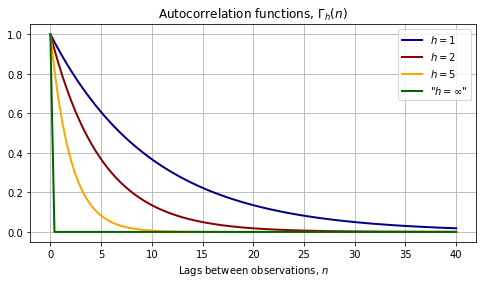

In [7]:
μ = .0
κ = .1
σ = .5
var_uncond = σ**2 / (2 * κ)

n_grid = np.linspace(0, 40, 100)
autocorr_h1 = np.exp(-κ * n_grid * 1)
autocorr_h2 = np.exp(-κ * n_grid * 2)
autocorr_h5 = np.exp(-κ * n_grid * 5)
autocorr_h1000 = np.exp(-κ * n_grid * 1e8)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(n_grid, autocorr_h1, label=r'$h=1$', c='darkblue', lw=2)
ax.plot(n_grid, autocorr_h2, label=r'$h=2$', c='darkred', lw=2)
ax.plot(n_grid, autocorr_h5, label=r'$h=5$', c='orange', lw=2)
ax.plot(n_grid, autocorr_h1000, label=r'"$h=\infty$"', c='darkgreen', lw=2)
ax.legend()
ax.grid()
ax.set(title=r'Autocorrelation functions, $\Gamma_h(n)$',
       xlabel=r'Lags between observations, $n$')
plt.show()

### Frequency and the Mean Estimator

Consider again the AR(1) process generated by discrete sampling with
frequency $ h $. Assume that we have a sample of size $ N $ and
we would like to estimate the unconditional mean – in our case the true
mean is $ \mu $

Again, the sample average is an unbiased estimator of the unconditional
mean

$$
\mathbb{E}[\bar X_N] = \frac{1}{N}\sum_{i = 1}^N \mathbb{E}[X_i] = \mathbb{E}[X_0] = \mu
$$

The variance of the sample mean is given by

$$
\begin{align}
\mathbb{V}\left(\bar X_N\right) &= \mathbb{V}\left(\frac{1}{N}\sum_{i = 1}^N X_i\right) \\
&= \frac{1}{N^2} \left(\sum_{i = 1}^N \mathbb{V}(X_i) + 2 \sum_{i = 1}^{N-1} \sum_{s = i+1}^N \text{cov}(X_i, X_s) \right) \\
&= \frac{1}{N^2} \left( N \gamma(0) + 2 \sum_{i=1}^{N-1} i \cdot \gamma\left(h\cdot (N - i)\right) \right) \\
&= \frac{1}{N^2} \left( N \frac{\sigma^2}{2\kappa} + 2 \sum_{i=1}^{N-1} i \cdot \exp(-\kappa h (N - i)) \frac{\sigma^2}{2\kappa} \right)
\end{align}
$$

It is explicit in the above equation that time dependence in the data
inflates the variance of the mean estimator through the covariance
terms. Moreover, as we can see, a higher sampling frequency—smaller
$ h $—makes all the covariance terms larger everything else being
fixed. This implies a relatively slower rate of convergence of the
sample average for high frequency data

Intuitively, the stronger dependence across observations for high frequency data reduces the
“information content” of each observation relative to the iid case

We can upper bound the variance term in the following way

$$
\begin{align}
\mathbb{V}(\bar X_N) &= \frac{1}{N^2} \left( N \sigma^2 + 2 \sum_{i=1}^{N-1} i \cdot \exp(-\kappa h (N - i)) \sigma^2 \right) \\
&\leq \frac{\sigma^2}{2\kappa N} \left(1 + 2 \sum_{i=1}^{N-1} \cdot \exp(-\kappa h (i)) \right) \\
&= \underbrace{\frac{\sigma^2}{2\kappa N}}_{\text{i.i.d.  case}} \left(1 + 2 \frac{1 - \exp(-\kappa h)^{N-1}}{1 - \exp(-\kappa h)} \right)
\end{align}
$$

Asymptotically the $ \exp(-\kappa h)^{N-1} $ vanishes and the
dependence in the data inflates the benchmark iid variance by a factor
of

$$
\left(1 + 2 \frac{1}{1 - \exp(-\kappa h)} \right)
$$

This long run factor is larger the higher is the frequency (the smaller
is $ h $)

Therefore, we expect the asymptotic relative MSEs, $ B $, to change
with time dependent data. We just saw that the mean estimator’s rate is
roughly changing by a factor of

$$
\left(1 + 2 \frac{1}{1 - \exp(-\kappa h)} \right)
$$

Unfortunately, the variance estimator’s MSE is harder to derive

Nonetheless, we can approximate it by using (large sample) simulations,
thus getting an idea about how the asymptotic relative MSEs changes in
the sampling frequency $ h $ relative to the iid case that we
compute in closed form

In [8]:
def sample_generator(h, N, M):
    ϕ = (1 - np.exp(-κ * h)) * μ
    ρ = np.exp(-κ * h)
    s = σ**2 * (1 - np.exp(-2 * κ * h)) / (2 * κ)

    mean_uncond = μ
    std_uncond = np.sqrt(σ**2 / (2 * κ))

    ε_path = stat.norm(0, np.sqrt(s)).rvs((M, N))

    y_path = np.zeros((M, N + 1))
    y_path[:, 0] = stat.norm(mean_uncond, std_uncond).rvs(M)

    for i in range(N):
        y_path[:, i + 1] = ϕ + ρ * y_path[:, i] + ε_path[:, i]

    return y_path

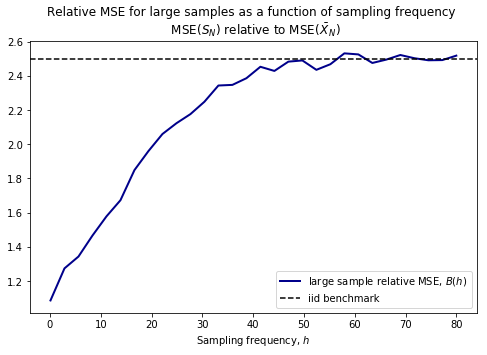

In [9]:
# Generate large sample for different frequencies
N_app, M_app = 1000, 30000                      # Sample size, number of simulations
h_grid = np.linspace(.1, 80, 30)

var_est_store = []
mean_est_store = []
labels = []

for h in h_grid:
    labels.append(h)
    sample = sample_generator(h, N_app, M_app)
    mean_est_store.append(np.mean(sample, 1))
    var_est_store.append(np.var(sample, 1))

var_est_store = np.array(var_est_store)
mean_est_store = np.array(mean_est_store)

# Save mse of estimators
mse_mean = np.var(mean_est_store, 1) + (np.mean(mean_est_store, 1) - μ)**2
mse_var = np.var(var_est_store, 1) + (np.mean(var_est_store, 1) - var_uncond)**2

benchmark_rate = 2 * var_uncond       # iid case

# Relative MSE for large samples
rate_h = mse_var / mse_mean

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(h_grid, rate_h, c='darkblue', lw=2,
        label=r'large sample relative MSE, $B(h)$')
ax.axhline(benchmark_rate, c='k', ls='--', label=r'iid benchmark')
ax.set_title('Relative MSE for large samples as a function of sampling frequency \n MSE($S_N$) relative to MSE($\\bar X_N$)')
ax.set_xlabel('Sampling frequency, $h$')
ax.legend()
plt.show()

The above figure illustrates the relationship between the asymptotic
relative MSEs and the sampling frequency

- We can see that with low frequency data – large values of $ h $
  – the ratio of asymptotic rates approaches the iid case  
- As $ h $ gets smaller – the higher the frequency – the relative
  performance of the variance estimator is better in the sense that the
  ratio of asymptotic rates gets smaller. That is, as the time
  dependence gets more pronounced, the rate of convergence of the mean
  estimator’s MSE deteriorates more than that of the variance
  estimator  